# Classifier for Machine Learning Basics - Activity 2

## Brief

· Start when ready, don’t worry if still working through Activity 1

· Generate a simple 2D data set with 3 classes

· Implement a Naïve Bayes, multivariate Gaussian, and k nearest neighbour classifier

· Use train/validate/test to choose best value of k

· Visualise the results and compute performance metrics: computation time, confusion matrix, classifier accuracy.

## Initial Script

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
plt.close("all")
import time
import pandas as pd

import sklearn.datasets as skl_datasets
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [2]:
# Main Variables

n_classes = 3
n_samples = 500 
n_dim = 2 # number of dimensions

## Functions

In [3]:
# Functions

def split_partition(X, y, train_split):
    # merge y (classifications) and X (co-ordinates)
    y = np.reshape(y, (len(y), 1))
    Xy = np.concatenate((X, y), axis=1)
    
    # split dataset into training and test partitions
    sample_size = Xy.shape[0]
    indices = np.random.permutation(sample_size)
    i = int(sample_size * train_split) 
    train_indices, test_indices = indices[:i], indices[i:]
    Xy_train, Xy_test = Xy[train_indices, :], Xy[test_indices, :]

    return Xy_train, Xy_test

def plotOriginalData(Train, Test, n_dim):
    # plot original data (2dim only)
    if n_dim > 2:
        print('Dimensions > 2, Plots will not work!')
        
    plt.figure()
    plt.title('Train and Test Data')
    c = ['tab:blue', 'tab:pink', 'tab:red', 'tab:green', 'tab:brown', 'tab:purple']
    for i in range(n_classes):
        # plot Train Data
        plt.scatter(Train.Class[i].iloc[:,0], Train.Class[i].iloc[:,1], 
        label='Train - Class '+str(i), c=c[i], alpha = 0.6)
        # plot Test Data
        plt.scatter(Test.Class[i].iloc[:,0], Test.Class[i].iloc[:,1], 
        label='Test - Class '+str(i), c=c[i], alpha = 0.3)
        plt.legend()

def trainModel(TechniqueClass):
    # train Naive Bayes classifier model
    time_start = time.time()
    TechniqueClass.model = TechniqueClass.model.fit(Train.all_X, Train.all_y)
    time_total = time.time() - time_start
    print('Time taken to train', TechniqueClass.label, 'model = ', time_total, 's')

def makePredictions(TechniqueClass):
    # apply model by predicting classifications on test dataset
    y_pred = TechniqueClass.model.predict(Test.all_X)

    # create datafram with actual and predicted 
    act_v_pred = pd.concat([Test.all_y, pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)

    # add actual & predicted classifications to X dataframe
    TechniqueClass.Test_pred_df = pd.concat([Test.all_X, act_v_pred], axis=1)

def plot_Actual_V_Predicted(TechniqueClass, n_classes, fig, fig_count):
    # Plot Actual Vs.Predicted Classifications on separate subplots for comparison

    fig[fig_count], (ax1, ax2) = plt.subplots(1, 2)
    plt.title('Actual Vs. Predicted Classifications')
    c = ['tab:blue', 'tab:pink', 'tab:red', 'tab:green', 'tab:brown', 'tab:purple']

    ax1.set_title('Test Dataset \n Actual Classification')
    for i in range(n_classes):
        ax1.scatter(Test.Class[i].iloc[:,0], Test.Class[i].iloc[:,1],
         label='Actual - Class '+str(i), c=c[i], alpha = 0.3)
    ax1.legend()

    title_str = 'Test Dataset \n %s \n Predicted Classification' % TechniqueClass.label
    ax2.set_title(title_str)
    for i in range(n_classes):
        test_predictions = TechniqueClass.Test_pred_df
        y_pred_i = test_predictions.loc[test_predictions['y_pred']==i]
        X_1, X_2 = y_pred_i.iloc[:, 0], y_pred_i.iloc[:, 1]
        ax2.scatter(X_1, X_2, label= 'Predicted - Class '+ str(i), c=c[i], alpha = 0.3)
    ax2.legend()

    fig_count =+ 1
    return fig_count

def safeDiv(num, den):
    try:
        return num/den
    except ZeroDivisionError:
        return 0

## Classes

In [4]:
# Classes
      
class Partition():
    def __init__(self, df):
        print('Creating Partition')
        
        class_objects = []
        for i in range(n_classes):
            df_split = df.loc[df['y']==i]
            print('Class ', i, ' split from df \n')
            class_objects.append(df_split)
            
        self.Class = class_objects # creates object as list of objects (classified data)
        self.all_X = df.iloc[:, :n_dim] # creates object with all X data (non-classified data)
        self.all_y = df.iloc[:, n_dim]  # creates object with all y data (non-classified data)

class PredictionTechnique():
    def __init__(self, label):
        self.label = label
        print('class created')
        
        

## Main script

### i) Generate data 

In [5]:
# generate two-class dataset (green and blue)
X, y = skl_datasets.make_blobs(n_samples=n_samples, n_features=n_dim, centers=n_classes, random_state=0)
# ... where X is the co-ordinates 
#     and Y gives their classification 

# remove -ve values from x and y components of X 
# ... by adding smallest component to all
X[:] = X[:] + abs(np.min(X[:]))
print('After all values made positive, X = \n', X[:5, :], '\n   ...        ...\n')



After all values made positive, X = 
 [[5.21288282 8.81547734]
 [2.17685491 7.75195141]
 [2.07527903 5.9757028 ]
 [5.72610225 6.79653193]
 [3.14969092 8.60226657]] 
   ...        ...



### ii) Partition Data

In [6]:
# split dataset into training and testing partitions
train_split = 0.7
train_all, test_all = split_partition(X, y, train_split)

# convert to DataFrame
cols = []
for n in range(n_dim):
    cols.append('X_'+str(n+1))
cols.append('y')
train_all_df, test_all_df = pd.DataFrame(train_all, columns=cols), pd.DataFrame(test_all, columns=cols)

# print samples
print('Training Data (%.1f rows) head: \n' % (train_all_df.shape[0]), train_all_df.head(), '\n')
print('Test Data (%.1f rows) head: \n' % (test_all_df.shape[0]), test_all_df.head(), '\n')

Training Data (350.0 rows) head: 
         X_1       X_2    y
0  5.607036  7.837700  0.0
1  5.529834  8.747162  0.0
2  5.758265  8.820950  0.0
3  1.734476  6.701913  2.0
4  5.716803  4.358026  1.0 

Test Data (150.0 rows) head: 
         X_1        X_2    y
0  4.432388   6.813416  2.0
1  2.478453   6.039581  2.0
2  1.779655   6.563245  2.0
3  5.057788   8.841820  0.0
4  3.912847  10.357109  0.0 



### iii) Classify Data (Manually)

In [7]:
# create classes with classified data
Train = Partition(train_all_df)
Test  = Partition(test_all_df)

Creating Partition
Class  0  split from df 

Class  1  split from df 

Class  2  split from df 

Creating Partition
Class  0  split from df 

Class  1  split from df 

Class  2  split from df 



In [8]:
# display test data by class
for n in range(n_classes):
    print('Test data for class', n, '\n', Test.Class[n], '\n')

Test data for class 0 
           X_1        X_2    y
3    5.057788   8.841820  0.0
4    3.912847  10.357109  0.0
5    6.006830   8.732216  0.0
8    3.379701  10.364263  0.0
15   3.779444  10.071619  0.0
17   6.618750   9.882847  0.0
20   4.341216   7.587049  0.0
21   4.401960  10.073039  0.0
24   4.967807   7.733310  0.0
25   3.793114   8.680539  0.0
26   5.942801   7.762462  0.0
27   6.580050   8.208330  0.0
29   5.579713   8.297384  0.0
32   4.015218   9.467940  0.0
33   5.815061   8.542471  0.0
34   2.426798   9.019807  0.0
37   4.282561   7.723938  0.0
38   5.512229   9.090396  0.0
42   5.024344   8.306183  0.0
43   5.609862   8.501910  0.0
46   6.033223   8.258478  0.0
48   5.551633   6.877244  0.0
49   3.330080   8.864422  0.0
55   5.847008   8.535163  0.0
56   4.178672   8.465433  0.0
64   4.451649   8.050747  0.0
65   3.833175   9.190978  0.0
71   4.775085   8.510888  0.0
73   6.316261   9.615868  0.0
75   3.594713   8.852880  0.0
77   5.068950   8.792640  0.0
84   4.953090   

### iv) Plot orginal data

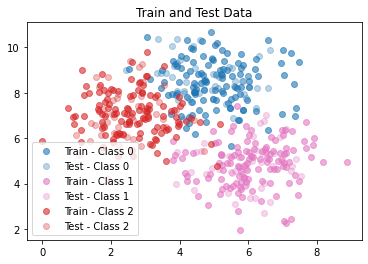

In [9]:
plotOriginalData(Train, Test, n_dim)


### v) Create Models

In [10]:
# initialise technique classes
NB  = PredictionTechnique('Naive-Bayes')
MVG = PredictionTechnique('Multi-Variate Gaussian')
KNN = PredictionTechnique('K-Nearest Neighbour')

class created
class created
class created


In [11]:
# initialise models
NB.model  = CategoricalNB()
MVG.model = GaussianMixture(n_components = n_classes, random_state=0)
KNN.model = KNeighborsClassifier(n_neighbors = n_classes)

### vi) Train, Apply & Plot Techniques

Training and applying Naive-Bayes technique
Time taken to train Naive-Bayes model =  0.01371622085571289 s
Naive-Bayes accuracy score = 0.920000
Naive-Bayes confusion matrix:
 [[46  1  7]
 [ 1 47  1]
 [ 1  1 45]] 


Training and applying Multi-Variate Gaussian technique
Time taken to train Multi-Variate Gaussian model =  0.010529518127441406 s
Multi-Variate Gaussian accuracy score = 0.293333
Multi-Variate Gaussian confusion matrix:
 [[ 1 50  3]
 [48  0  1]
 [ 1  3 43]] 


Training and applying K-Nearest Neighbour technique
Time taken to train K-Nearest Neighbour model =  0.0018465518951416016 s
K-Nearest Neighbour accuracy score = 0.953333
K-Nearest Neighbour confusion matrix:
 [[51  0  3]
 [ 2 47  0]
 [ 1  1 45]] 




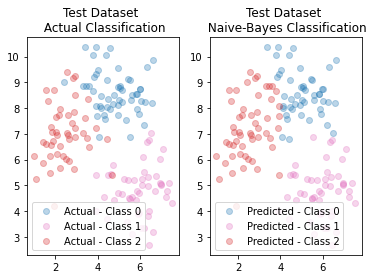

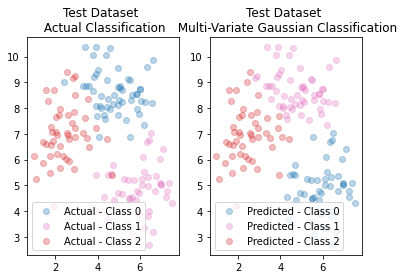

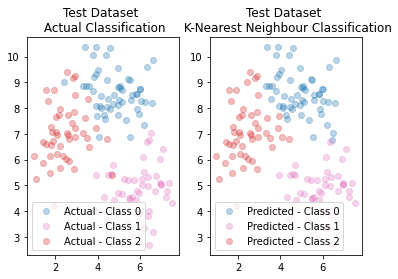

In [12]:
def getResults(TechniqueClass):
    actual = np.array(TechniqueClass.Test_pred_df.loc[:, 'y'])
    predicted = np.array(TechniqueClass.Test_pred_df.loc[:, 'y_pred'] )
    t.model.confusion_matrix = confusion_matrix(actual, predicted)
    return accuracy_score(actual, predicted)

techniques = [NB, MVG, KNN]
fig = [None] * len(techniques)
fig_count = 1
for t in techniques:
    print('Training and applying %s technique' % t.label)
    trainModel(t)
    makePredictions(t)
    figcount = plot_Actual_V_Predicted(t, n_classes, fig, fig_count)
    t.accuracy_score = getResults(t)
    print('%s accuracy score = %f' % (t.label, t.accuracy_score))
    print(t.label,'confusion matrix:\n', t.model.confusion_matrix , '\n\n')



